In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
62151,00015376_032.png,Nodule,32,15376,60,F,PA,2434,2222,0.143,0.143,NaN
36116,00009527_005.png,No Finding,5,9527,29,M,AP,2500,2048,0.168,0.168,NaN
104863,00028116_000.png,No Finding,0,28116,47,F,PA,2992,2991,0.143,0.143,NaN


In [3]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
1185,00006271_095.png,Infiltration,95,6271,040Y,M,AP,2500,2048,0.171,0.171
3563,00017618_019.png,Cardiomegaly|Consolidation|Effusion|Mass|Pneum...,19,17618,035Y,M,PA,2992,2991,0.143,0.143
4999,00026399_010.png,No Finding,10,26399,056Y,M,PA,2992,2991,0.143,0.143



**Start here**

**1. The patient demographic data**


Text(0, 0.5, 'Image number')

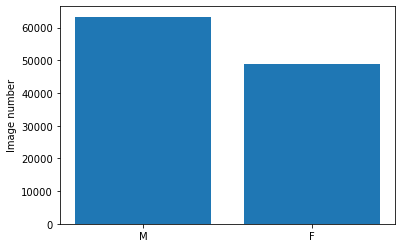

In [4]:
plt.bar(all_xray_df['Patient Gender'].unique(),all_xray_df['Patient Gender'].value_counts())
plt.ylabel('Image number')

Text(0, 0.5, 'Image number')

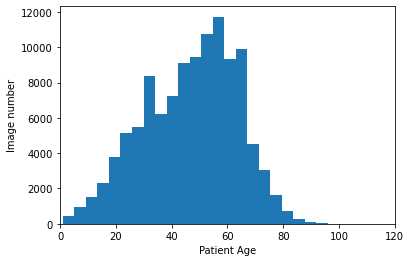

In [5]:
plt.hist(all_xray_df['Patient Age'],bins=100)
plt.xlim(0,120)
plt.xlabel('Patient Age')
plt.ylabel('Image number')

**2. The x-ray views taken**

Text(0.5, 0, 'View position')

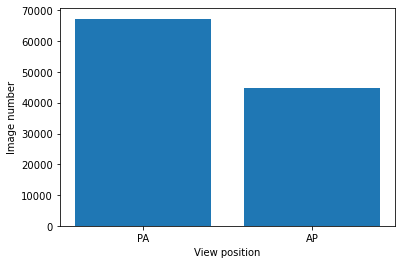

In [6]:
plt.bar(all_xray_df['View Position'].unique(),all_xray_df['View Position'].value_counts())
plt.ylabel('Image number')
plt.xlabel('View position')

**3. Explore the number of diseases and distribution**


In [7]:
## EDA
#The number of diseases
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
77821,00019124_054.png,Infiltration|Nodule,54,19124,53,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
69930,00017236_012.png,Infiltration,12,17236,46,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
62132,00015376_013.png,Infiltration,13,15376,60,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Disease')

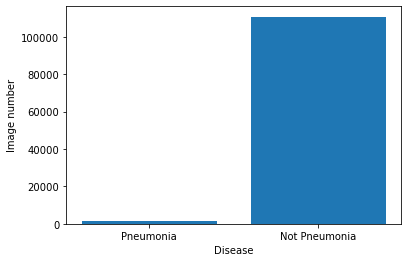

In [9]:
plt.bar(['Pneumonia','Not Pneumonia'],[sum(all_xray_df['Pneumonia']==1),sum(all_xray_df['Pneumonia']==0)])
plt.ylabel('Image number')
plt.xlabel('Disease')

In [10]:
print('The rate of pneumonia is %0.3f' %(sum(all_xray_df['Pneumonia']==1)/all_xray_df.shape[0]))

The rate of pneumonia is 0.013


**4. The distribution of other diseases that are comorbid with pneumonia**

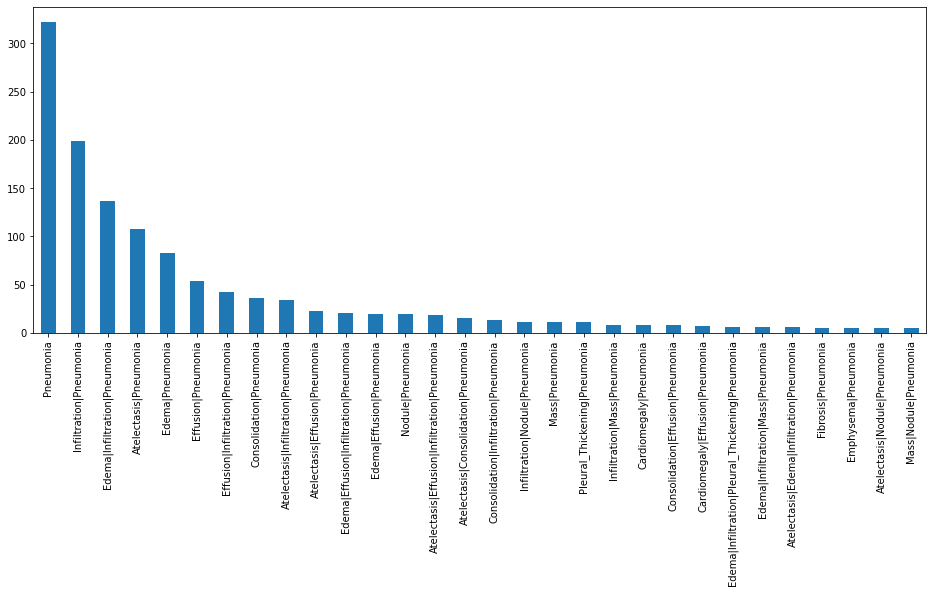

In [11]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df['Pneumonia']==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

**5. Number of disease per patient**

Text(0.5, 0, 'Number of disease per patient')

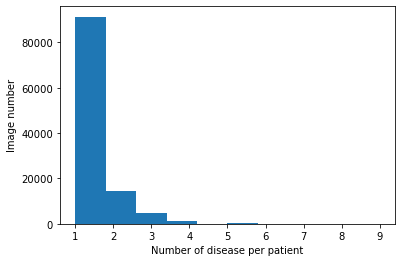

In [12]:
plt.hist(all_xray_df[all_labels].sum(axis=1))
plt.ylabel('Image number')
plt.xlabel('Number of disease per patient')

**6. Pixel-level assessments of the imaging data for healthy & disease states of interest.**

In [13]:
sample_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
sample_labels = [x for x in sample_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(sample_labels), sample_labels))
for c_label in sample_labels:
    if len(c_label)>1: # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
4761,00024851_000.png,No Finding,0,24851,021Y,F,PA,2484,3036,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1577,00008188_001.png,Nodule,1,8188,034Y,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4523,00022574_000.png,Effusion|Infiltration,0,22574,046Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
sample_paths={os.path.basename(x): x for x in glob(os.path.join('/data','images*','*','*.png'))}
sample_df['path']=sample_df['Image Index'].map(sample_paths.get)

In [15]:
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
591,00003053_003.png,No Finding,3,3053,083Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_002/images/00003053_003.png
81,00000468_005.png,Emphysema|Pneumothorax,5,468,031Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/data/images_001/images/00000468_005.png
3793,00018627_011.png,Pleural_Thickening,11,18627,056Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/data/images_009/images/00018627_011.png


In [16]:
pne_df=sample_df[sample_df['Pneumonia']==1]
health_df=sample_df[sample_df['No Finding']==1]

Text(0.5, 1.0, 'Healthy')

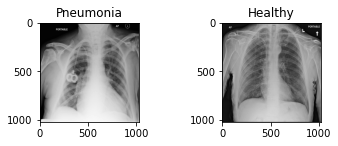

In [31]:
image_pne=plt.imread(pne_df.iloc[0,-1])
image_healthy=plt.imread(health_df.iloc[1,-1])

plt.subplot(221)
plt.imshow(image_pne,cmap='gray')
plt.title('Pneumonia')

plt.subplot(222)
plt.imshow(image_healthy,cmap='gray')
plt.title('Healthy')

**6.1 Compare intensity values distributions within diagnoses.**

Text(0.5, 1.0, 'Histogram of intensity values of normalized pneumonia images')

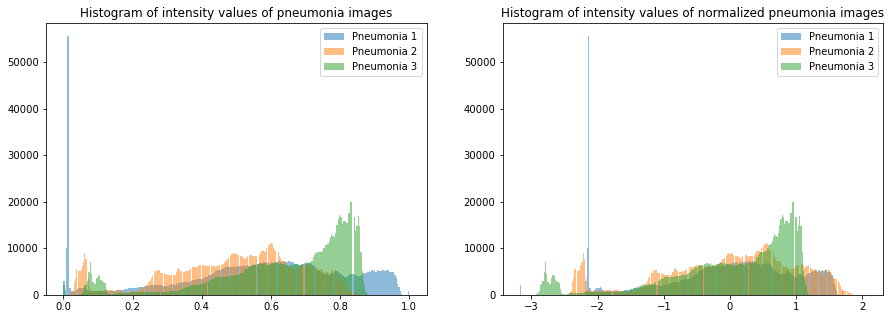

In [27]:
pne_intensities_1=plt.imread(pne_df.iloc[0,-1]).reshape(1,-1)[0]
pne_intensities_2=plt.imread(pne_df.iloc[3,-1]).reshape(1,-1)[0]
pne_intensities_3=plt.imread(pne_df.iloc[5,-1]).reshape(1,-1)[0]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pne_intensities_1,bins=256,alpha=0.5, label='Pneumonia 1')
plt.hist(pne_intensities_2,bins=256,alpha=0.5, label='Pneumonia 2')
plt.hist(pne_intensities_3,bins=256,alpha=0.5, label='Pneumonia 3')
plt.legend(loc='upper right')
plt.title('Histogram of intensity values of pneumonia images')

pne_intensities_nor_1=(pne_intensities_1-np.mean(pne_intensities_1))/np.std(pne_intensities_1)
pne_intensities_nor_2=(pne_intensities_2-np.mean(pne_intensities_2))/np.std(pne_intensities_2)
pne_intensities_nor_3=(pne_intensities_3-np.mean(pne_intensities_3))/np.std(pne_intensities_3)

plt.subplot(122)
plt.hist(pne_intensities_nor_1,bins=256,alpha=0.5, label='Pneumonia 1')
plt.hist(pne_intensities_nor_2,bins=256,alpha=0.5, label='Pneumonia 2')
plt.hist(pne_intensities_nor_3,bins=256,alpha=0.5, label='Pneumonia 3')
plt.legend(loc='upper right')
plt.title('Histogram of intensity values of normalized pneumonia images')

We can see that the distributions of intensity values within pneumonia are similar, but the modes can be different.

**6.2 Compare intensity values distributions between diagnoses.**

In [29]:
pne_intensities = []

for i in pne_df.iloc[0:20,-1]: 
    
    img = plt.imread(i)
    pne_intensities.extend(img.reshape(1,-1)[0])
    
healthy_intensities = []

for i in health_df.iloc[0:20,-1]: 
    
    img = plt.imread(i)
    healthy_intensities.extend(img.reshape(1,-1)[0])   

Text(0.5, 1.0, 'Histogram of intensity values of pneumonia and healthy images')

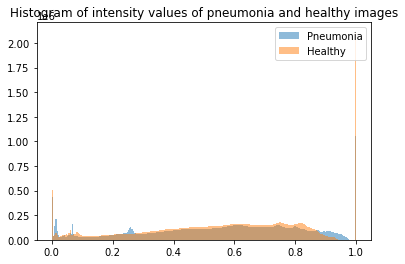

In [30]:
plt.hist(pne_intensities,bins=256,alpha=0.5, label='Pneumonia')
plt.hist(healthy_intensities,bins=256,alpha=0.5, label='Healthy')
plt.legend(loc='upper right')
plt.title('Histogram of intensity values of pneumonia and healthy images')

**Conclusion:**
* We can see from the EDA that there are slightly more male patients than female patients in the dataset.  Most patients are 20-70 years old. 
* 60% X-ray images were taken at PA position and 40% were take at AP position.
* Pneumonia happening rate is low (1.3%), but it can come together with other diseases such as infiltration and edema. Therefore, we need to make sure we have balanced ratio of pneumonia and healthy images during training. We also need to check whether other diseases may affect the precise and recall of pneumonia detection.
* There are no significant difference of intensity values distribution between pneumonia and healthy images. Therefore, we will train the model on the pixel patterns rather than pixel values distributions.
